# Experimento 1 - RPL-UDP-TSCH

Neste notebook realizamos a conversão do arquivo de logs do Cooja e registramos em CSV os dados da simulação, além disso, apresentamos alguns gráficos dos resultados da simulação.
Este primeiro experimento consiste em uma rede estática com alguma profundiade porém sem qualquer tipo de interferência entre os nodes.

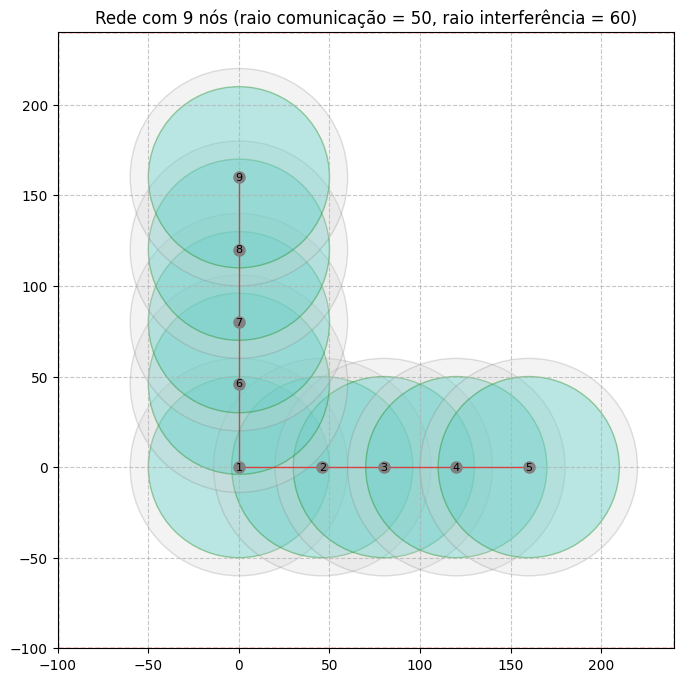


=== MÉDIAS POR MOTE ===
           node  rtt_latency  r2n_latency  n2r_latency   rssi  radio_rx_energy_mj  radio_tx_energy_mj  cpu_energy_mj  throughput1  throughput2
fd00::202:2:2:2       861.07        54.50       416.67 -87.74                7.98                0.13          18.00         0.02         0.02
fd00::203:3:3:3      1233.08       566.66       678.01 -66.81               10.38                0.02          18.32         0.06         0.06
fd00::204:4:4:4      1501.45      1258.71       858.52 -77.76               14.45                0.00          19.69         0.16         0.16
fd00::205:5:5:5      1744.70      2068.89       868.52 -77.76               17.12                0.00          19.79         0.22         0.22
fd00::206:6:6:6       791.31       224.96       359.92 -87.73               10.78                0.20          19.37         0.04         0.77
fd00::207:7:7:7      1171.62       708.78       657.36 -66.80               13.01                0.03          18.51 

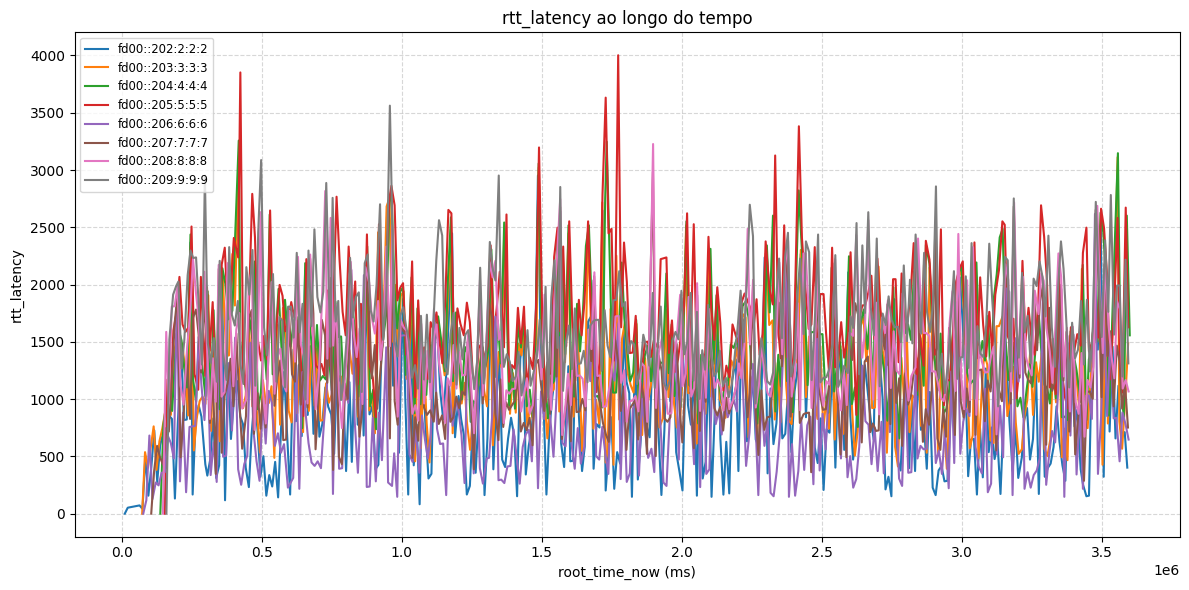

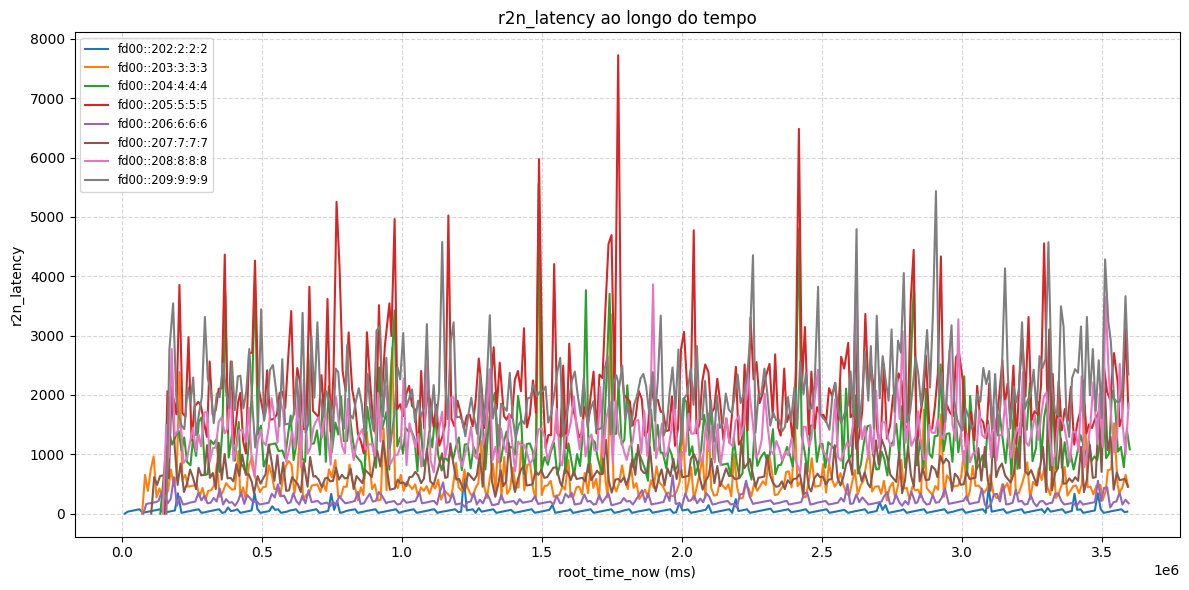

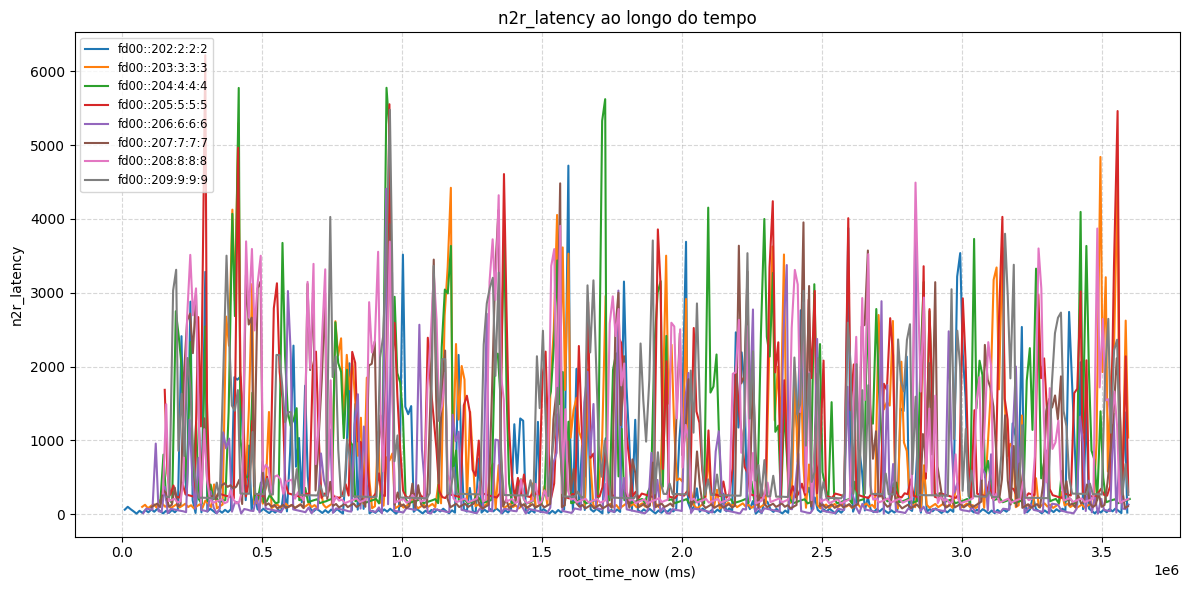

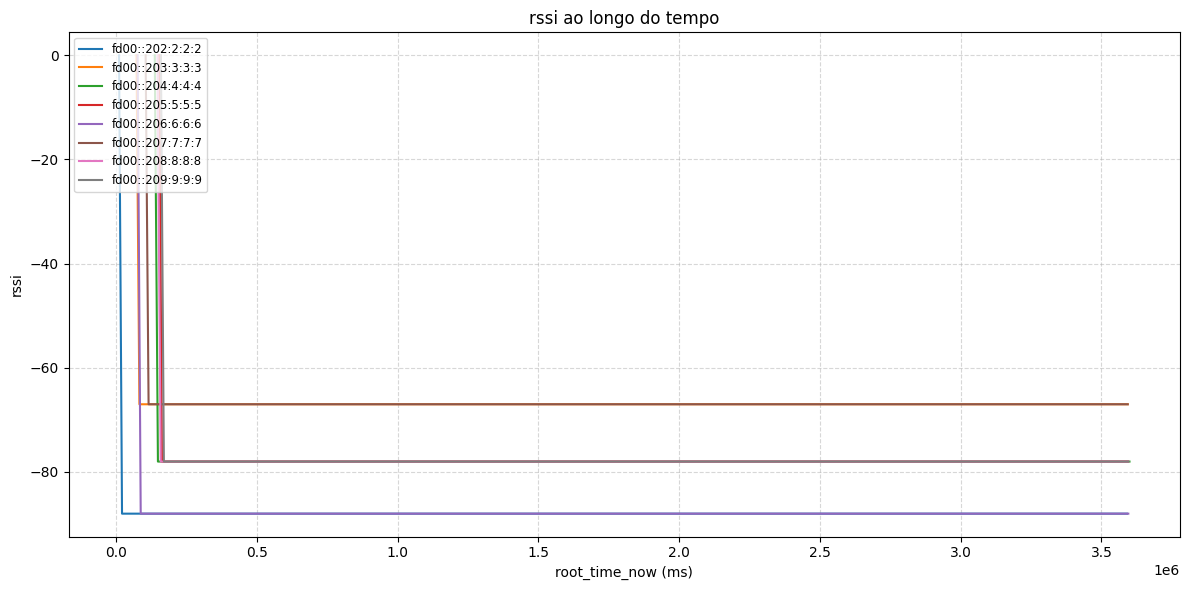

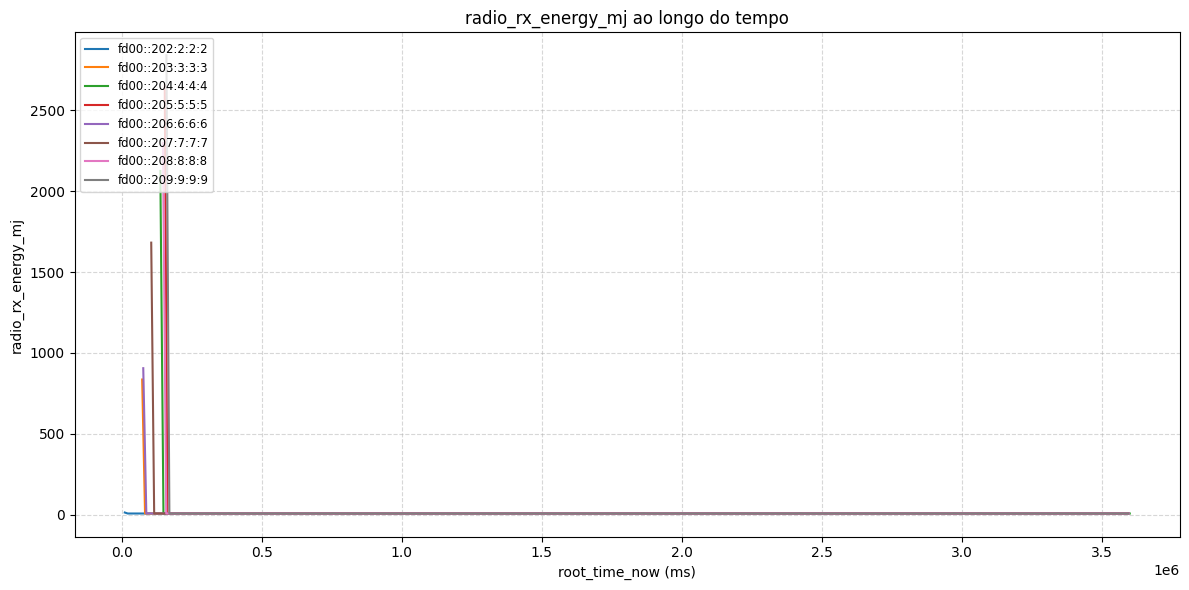

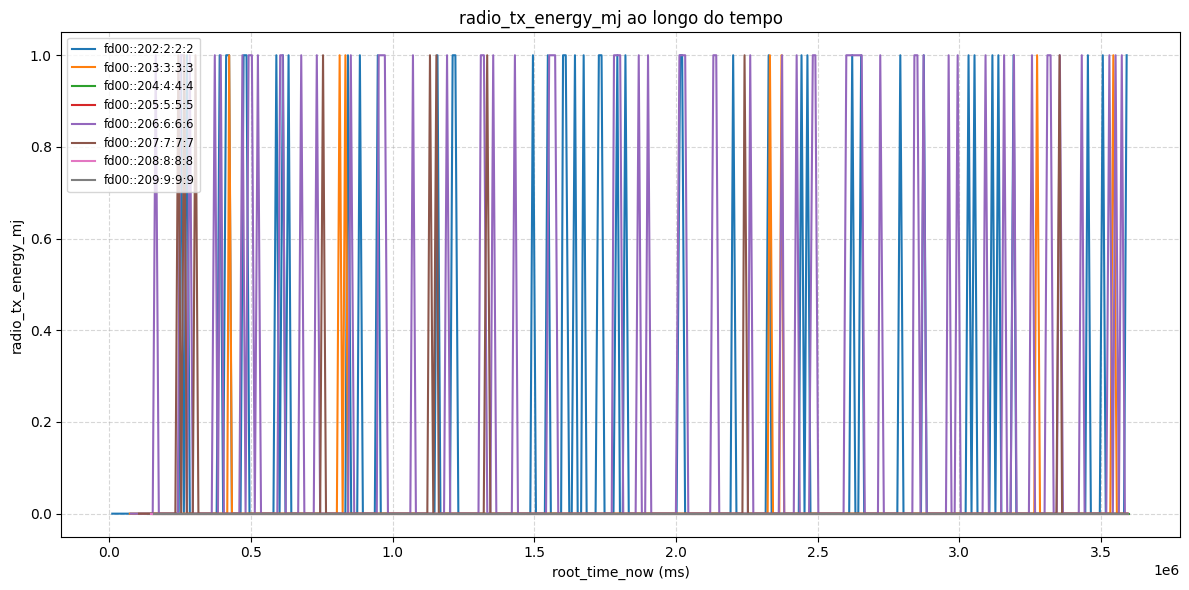

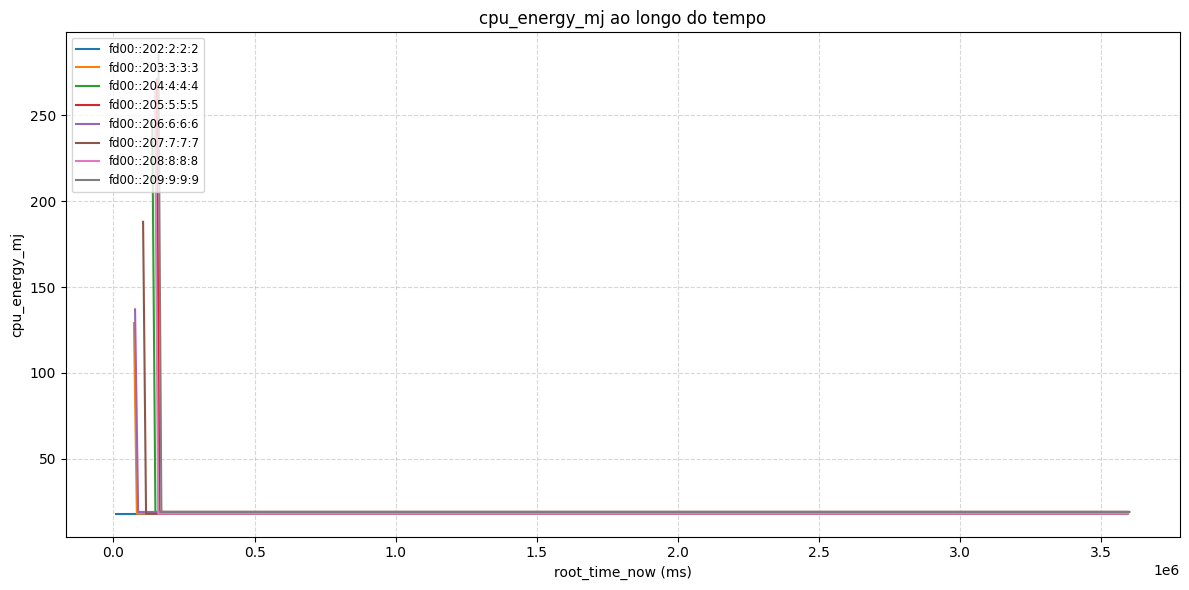

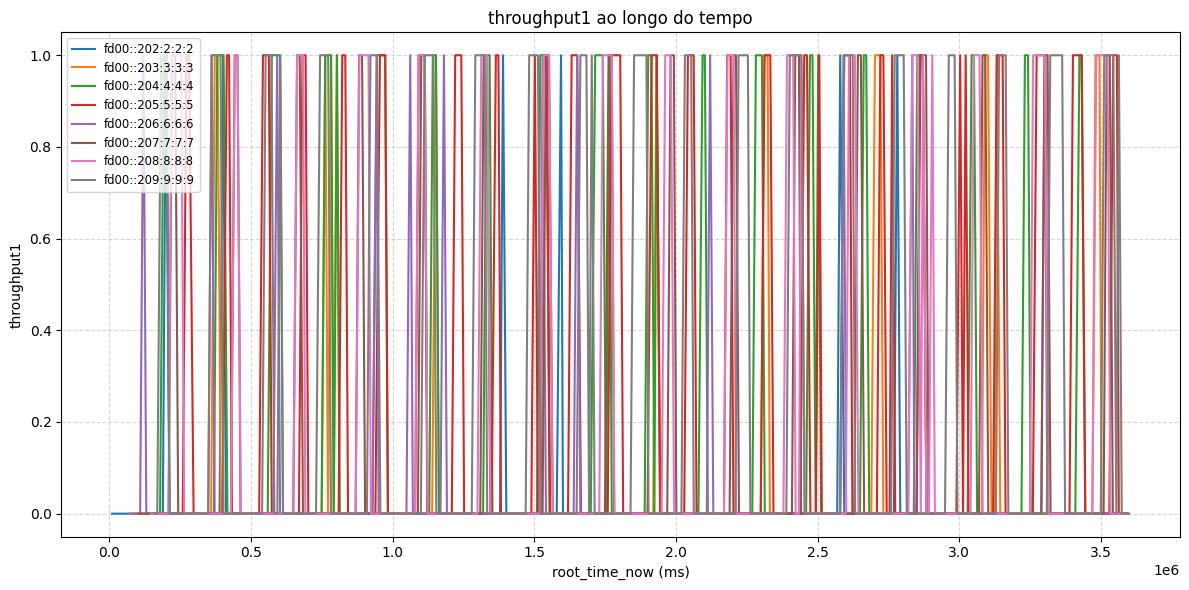

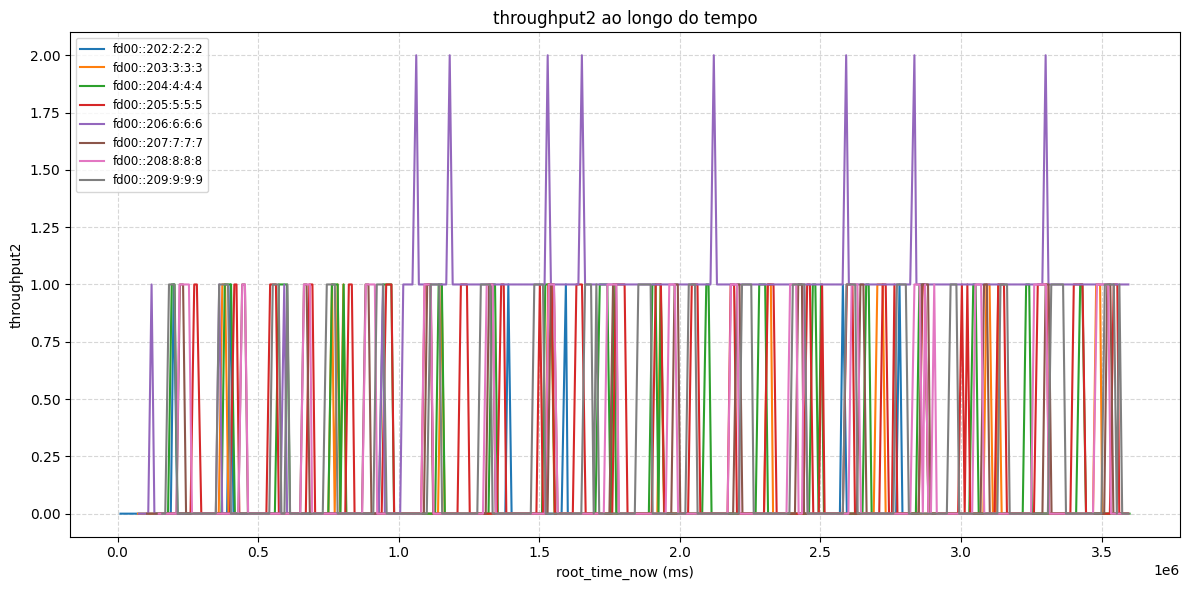

In [1]:
import sys, os

project_path = os.path.abspath(os.path.join(os.getcwd(), "../../../../.."))  # Ajuste conforme a localização do notebook
if project_path not in sys.path:
    sys.path.insert(0, project_path)
    
from pylib import visual
from pylib import data_analysis

exp = visual.plot_network_from_json("../../../../model/static/ex1.json")

import matplotlib.pyplot as plt
from pathlib import Path

# -------------------------- Configurações ----------------------------------
log_path = Path("./cooja.log")          # arquivo de log de entrada
csv_full  = Path("cooja_metrics.csv")   # métricas individuais
csv_means = Path("cooja_means.csv")     # médias por mote

# -------------------------- DataFrame bruto --------------------------------
df = data_analysis.convert_log_to_csv(log_path, csv_full)

# ------------------------- Médias por mote ---------------------------------
metrics_cols = [
    "rtt_latency",
    "r2n_latency",
    "n2r_latency",
    "rssi",
    "radio_rx_energy_mj",
    "radio_tx_energy_mj",
    "cpu_energy_mj",
    "throughput1",
    "throughput2",
]

means = (
    df.groupby("node")[metrics_cols]
      .mean()
      .round(2)            # duas casas decimais para facilitar leitura
      .reset_index()
)

means.to_csv(csv_means, index=False)
print("\n=== MÉDIAS POR MOTE ===")
print(means.to_string(index=False))
# --------------------------- Plots -----------------------------------------
unique_nodes = df["node"].unique()

for metric in metrics_cols:
    plt.figure(figsize=(12, 6))
    for node in unique_nodes:
        node_df = df[df["node"] == node]
        plt.plot(
            node_df["root_time_now"],
            node_df[metric],
            label=f"{node}",
        )
    plt.title(f"{metric} ao longo do tempo")
    plt.xlabel("root_time_now (ms)")
    plt.ylabel(metric)
    plt.legend(loc="upper left", fontsize="small")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()